# Classification

\# | Rank | Classifier | Options | Dataset | Score
--- | --- | --- | --- | ---| ---
1 |1 |SVM/C | `kernel='rbf', C=6.6, gamma=0.35` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `kernel='rbf', C=3.9, gamma=0.59` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `C=2.0` | Cleaned+MinMaxScaled | `0.973958333333`
2 |1 |SVM/C | `C=4.9` | Cleaned+RobustScaled | `0.973958333333`
3 |3 |SVM/C | `kernel='rbf', C=3.9` | Cleaned+MinMaxScaled | `0.967391304347`
4 |3 |SVM/C | `kernel='sigmoid', C=9.6` | Cleaned+MinMaxScaled | `0.967391304347`
5 |5 |RandomForest | `n_estimators=70` | Cleaned | `0.953125000000`
6 |5 |RandomForest | `n_estimators=70` | Cleaned+MinMaxScaled | `0.953125000000`
7 |5 |SVM/C | `C=2.6` | Cleaned+QuantileTransformed | `0.953125000000`
8 |8 |SVM/C | `C=4.3` | Cleaned | `0.947916666667`
9 |8 |RandomForest | `n_estimators=16` | Cleaned+RobustScaled | `0.947916666667`
10|8 |RandomForest | `n_estimators=32` | Cleaned+QuantileTransformed | `0.947916666667`
11|11|RandomForest | `n_estimators=90` | Full | `0.942708333333`
12|12|SVM/C | `default` | Full | `0.932291666667`

Default options:

- RandomForest with `n_estimators=50`, `oob_score=True` and `random_state=123456`.
- SVM/C with `kernel=linear`, `C=1.0`.

Normalizing all columns but `num_holes`.

In [1]:
# IMPORTS AND NOTEBOOK SETUP
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# IMPORTING OUR DATASET
data_full         = pd.read_csv('../dataset-numpy/dataset.csv')
data_clean_manual = pd.read_csv('../dataset-numpy/dataset-clean-manual.csv')
data_clean_manual.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,291.653385,44.952083,10.493405,13.664167,15.859298,15.380416,2.320312,42.125000,38.457292,4.064063,...,3.515104,31.285937,36.993750,6.548958,1.218229,37.840625,39.710417,6.739583,0.379688,4.532813
std,67.428881,8.744703,0.889372,0.814930,1.193617,1.869070,3.623932,13.615466,15.544662,8.440119,...,5.690358,19.265783,14.245519,6.925247,2.723832,14.236761,16.414749,9.965595,0.584767,2.868122
min,153.000000,20.000000,8.303587,11.549360,11.835737,10.582800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.000000,39.000000,9.822737,13.067626,15.077516,14.116460,0.000000,36.000000,29.000000,0.000000,...,0.000000,15.000000,28.000000,0.000000,0.000000,31.000000,33.000000,0.000000,0.000000,2.000000
50%,275.500000,44.000000,10.369215,13.617666,15.797984,15.295089,0.000000,45.000000,40.000000,0.000000,...,0.000000,32.000000,38.000000,5.000000,0.000000,40.000000,44.000000,2.000000,0.000000,5.000000
75%,326.000000,51.000000,11.043633,14.191667,16.571982,16.354908,4.000000,52.000000,50.000000,4.000000,...,6.000000,48.000000,47.000000,11.000000,1.000000,47.000000,51.000000,10.000000,1.000000,7.000000
max,512.000000,88.000000,13.117590,16.446964,20.410788,20.841542,22.000000,64.000000,64.000000,62.000000,...,39.000000,64.000000,64.000000,31.000000,29.000000,64.000000,64.000000,55.000000,2.000000,9.000000


## Normalization

In [3]:
columns = ['area', 'contours', 'radius', 'hull_radius', 'centroid_x', 'centroid_y']
for x in range(4):
    for y in range(4):
        columns.append('_'.join(['weight', str(x), str(y)]))
        
def scale(scaler):
    return pd.DataFrame(scaler.fit_transform(data_clean_manual[columns]), columns=columns)

### MinMaxScaler

In [4]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaled = data_clean_manual.copy()
minmaxscaled[columns] = scale(MinMaxScaler())
minmaxscaled.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,0.386221,0.366942,0.454885,0.431804,0.469217,0.467661,0.105469,0.658203,0.600895,0.065549,...,0.090131,0.488843,0.578027,0.211257,0.042008,0.591260,0.620475,0.122538,0.379688,4.532813
std,0.187824,0.128599,0.184747,0.166394,0.139196,0.182193,0.164724,0.212742,0.242885,0.136131,...,0.145907,0.301028,0.222586,0.223395,0.093925,0.222449,0.256480,0.181193,0.584767,2.868122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253482,0.279412,0.315569,0.310002,0.378048,0.344453,0.000000,0.562500,0.453125,0.000000,...,0.000000,0.234375,0.437500,0.000000,0.000000,0.484375,0.515625,0.000000,0.000000,2.000000
50%,0.341226,0.352941,0.429087,0.422310,0.462067,0.459344,0.000000,0.703125,0.625000,0.000000,...,0.000000,0.500000,0.593750,0.161290,0.000000,0.625000,0.687500,0.036364,0.000000,5.000000
75%,0.481894,0.455882,0.569182,0.539510,0.552328,0.562653,0.181818,0.812500,0.781250,0.064516,...,0.153846,0.750000,0.734375,0.354839,0.034483,0.734375,0.796875,0.181818,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,9.000000


### RobustScaler

In [5]:
from sklearn.preprocessing import RobustScaler

robustscaled = data_clean_manual.copy()
robustscaled[columns] = scale(RobustScaler())
robustscaled.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1.920000e+03,1.920000e+03,1.920000e+03,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,0.196993,0.079340,1.017201e-01,4.136941e-02,4.102775e-02,0.038119,0.580078,-0.179688,-0.073462,1.016016,...,0.585851,-0.021638,-0.052961,0.140814,1.218229,-0.134961,-0.238310,0.473958,0.379688,4.532813
std,0.822303,0.728725,7.284580e-01,7.250003e-01,7.986912e-01,0.834985,0.905983,0.850967,0.740222,2.110030,...,0.948393,0.583812,0.749764,0.629568,2.723832,0.889798,0.911930,0.996559,0.584767,2.868122
min,-1.493902,-2.000000,-1.691895e+00,-1.840064e+00,-2.651279e+00,-2.105159,0.000000,-2.812500,-1.904762,0.000000,...,0.000000,-0.969697,-2.000000,-0.454545,0.000000,-2.500000,-2.444444,-0.200000,0.000000,0.000000
25%,-0.384146,-0.416667,-4.476046e-01,-4.893416e-01,-4.820904e-01,-0.526539,0.000000,-0.562500,-0.523810,0.000000,...,0.000000,-0.515152,-0.526316,-0.454545,0.000000,-0.562500,-0.611111,-0.200000,0.000000,2.000000
50%,0.000000,0.000000,7.274827e-16,-7.901665e-16,5.943054e-16,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,0.615854,0.583333,5.523954e-01,5.106584e-01,5.179096e-01,0.473461,1.000000,0.437500,0.476190,1.000000,...,1.000000,0.484848,0.473684,0.545455,1.000000,0.437500,0.388889,0.800000,1.000000,7.000000
max,2.884146,3.666667,2.251112e+00,2.517077e+00,3.086590e+00,2.477812,5.500000,1.187500,1.142857,15.500000,...,6.500000,0.969697,1.368421,2.363636,29.000000,1.500000,1.111111,5.300000,2.000000,9.000000


### QuantileTransformer

In [6]:
from sklearn.preprocessing import QuantileTransformer

quantiletransformed = data_clean_manual.copy()
quantiletransformed[columns] = scale(QuantileTransformer())
quantiletransformed.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,...,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1920.000000,1920.000000
mean,4.999974e-01,5.000066e-01,4.999996e-01,5.000034e-01,4.999984e-01,4.999982e-01,3.476723e-01,5.000201e-01,4.999338e-01,3.040906e-01,...,3.541981e-01,4.985454e-01,5.000751e-01,4.382782e-01,2.425205e-01,4.997604e-01,5.000615e-01,3.952468e-01,0.379688,4.532813
std,2.888959e-01,2.887092e-01,2.888972e-01,2.889019e-01,2.888986e-01,2.888992e-01,3.955703e-01,2.889265e-01,2.891776e-01,3.990423e-01,...,3.943233e-01,2.916285e-01,2.889566e-01,3.562232e-01,3.891705e-01,2.893259e-01,2.903445e-01,3.811212e-01,0.584767,2.868122
min,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,...,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,0.000000,0.000000
25%,2.502503e-01,2.577578e-01,2.497667e-01,2.500801e-01,2.501045e-01,2.499021e-01,1.000000e-07,2.537538e-01,2.567568e-01,1.000000e-07,...,1.000000e-07,2.512513e-01,2.532533e-01,1.000000e-07,1.000000e-07,2.422422e-01,2.517518e-01,1.000000e-07,0.000000,2.000000
50%,5.010010e-01,4.809810e-01,4.998480e-01,5.000105e-01,4.999102e-01,4.999490e-01,1.000000e-07,5.080080e-01,4.894895e-01,1.000000e-07,...,1.000000e-07,5.010010e-01,4.889890e-01,5.055055e-01,1.000000e-07,5.100100e-01,5.025025e-01,5.200200e-01,0.000000,5.000000
75%,7.507508e-01,7.597598e-01,7.500140e-01,7.501820e-01,7.502810e-01,7.502003e-01,7.677678e-01,7.492492e-01,7.472472e-01,7.477477e-01,...,7.612613e-01,7.492492e-01,7.447447e-01,7.392392e-01,7.467467e-01,7.482482e-01,7.567568e-01,7.462462e-01,1.000000,7.000000
max,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,...,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,2.000000,9.000000


## Splitting the dataset

In [41]:
def split_data(data, split, validation):
    border = int(len(data) * split)
    train_data = data[:border]
    test_data = data[border:]

    assert len(train_data) + len(test_data) == len(data), "Invalid split!"

    X_train = train_data.iloc[:,:-1]
    Y_train = train_data.iloc[:,-1]

    X_test = test_data.iloc[validation:,:-1]
    Y_test = test_data.iloc[validation:,-1]
    
    X_validate = test_data.iloc[:validation,:-1]
    Y_validate = test_data.iloc[:validation,-1]
    return X_train, Y_train, X_test, Y_test, X_validate, Y_validate

X_train, Y_train, X_test, Y_test, X_validate, Y_validate = split_data(minmaxscaled, .2, 0)

## Try Random Forest Classifier

In [8]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

top_rf = (2, 0.0)
for n_e in range(2, 101):
    rf = RandomForestClassifier(n_estimators=n_e, oob_score=True, random_state=123456)
    rf.fit(X_train, Y_train)
    score = rf.score(X_test, Y_test)
    if score > top_rf[1]:
        top_rf = (n_e, score)
        print('N_E:', n_e, 'Score:', score)
print('Top:', top_rf)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=

N_E: 2 Score: 0.7676056338028169
N_E: 3 Score: 0.8169014084507042
N_E: 4 Score: 0.8873239436619719
N_E: 5 Score: 0.9014084507042254
N_E: 7 Score: 0.9154929577464789
N_E: 9 Score: 0.9225352112676056
N_E: 10 Score: 0.9366197183098591


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=

N_E: 14 Score: 0.9436619718309859
N_E: 16 Score: 0.9507042253521126


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=

N_E: 40 Score: 0.9577464788732394
Top: (40, 0.9577464788732394)


## Try Support Vector Machine

In [9]:
# SVM
from sklearn import svm

svc = svm.SVC(kernel='linear', C=2.0)
svc.fit(X_train, Y_train)
print('Score:', svc.score(X_test, Y_test))

Score: 0.971830985915493


### Predicting some validation values

In [10]:
for i in range(len(X_validate)):
    sample = np.array(X_validate.iloc[i,:], dtype=pd.Series).reshape(1, -1)
    label = Y_validate.iloc[i]
    prediction = svc.predict(sample)[0]
    print('prediction:', prediction, '== label', label, ':', prediction == label)

prediction: 0 == label 0 : True
prediction: 0 == label 0 : True
prediction: 8 == label 8 : True
prediction: 7 == label 7 : True
prediction: 8 == label 8 : True
prediction: 1 == label 1 : True
prediction: 2 == label 2 : True
prediction: 0 == label 0 : True
prediction: 5 == label 5 : True
prediction: 1 == label 1 : True
prediction: 6 == label 6 : True
prediction: 1 == label 2 : False
prediction: 3 == label 3 : True
prediction: 7 == label 7 : True
prediction: 7 == label 7 : True
prediction: 6 == label 6 : True
prediction: 9 == label 9 : True
prediction: 8 == label 8 : True
prediction: 1 == label 1 : True
prediction: 4 == label 4 : True
prediction: 3 == label 3 : True
prediction: 8 == label 8 : True
prediction: 5 == label 5 : True
prediction: 6 == label 6 : True
prediction: 7 == label 7 : True
prediction: 6 == label 6 : True
prediction: 1 == label 1 : True
prediction: 3 == label 3 : True
prediction: 7 == label 7 : True
prediction: 6 == label 6 : True
prediction: 7 == label 7 : True
predict

### Finding the optimal C value

In [11]:
Cs = np.arange(.1, 10, 0.1)
scores = np.zeros((len(Cs)))
index = 0
top = (.1, 0)
for c in Cs:
    svc = svm.SVC(kernel='linear', C=c)
    svc.fit(X_train, Y_train)
    score = svc.score(X_test, Y_test)
    scores[index] = score
    if score > top[1]:
        top = (c, score)
    index += 1

print('Top:', top)

Top: (1.4000000000000001, 0.971830985915493)


Max: 0.971830985915493


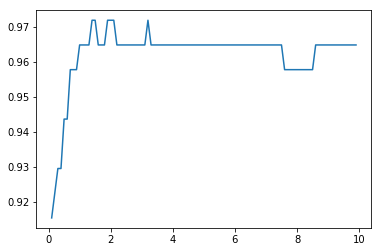

In [12]:
print('Max:', scores.max())
plt.plot(Cs, scores)

### Finding the optimal gamma for RBF kernel

In [17]:
Gs = np.arange(.01, 1, .01)
Cs = np.arange(.1, 10, .1)

steps = len(Gs) * len(Cs)
scores = np.zeros((steps))
index = 0
top = (.1, .01, 0)

for g in Gs:
    for c in Cs:
        print('%d / %d' % (index, steps))
        svc = svm.SVC(kernel='rbf', C=c, gamma=g)
        svc.fit(X_train, Y_train)
        score = svc.score(X_test, Y_test)
        scores[index] = score
        if score > top[2]:
            top = (c, g, score)
        index += 1

print('Top:', top)

0 / 9801
1 / 9801
2 / 9801
3 / 9801
4 / 9801
5 / 9801
6 / 9801
7 / 9801
8 / 9801
9 / 9801
10 / 9801
11 / 9801
12 / 9801
13 / 9801
14 / 9801
15 / 9801
16 / 9801
17 / 9801
18 / 9801
19 / 9801
20 / 9801
21 / 9801
22 / 9801
23 / 9801
24 / 9801
25 / 9801
26 / 9801
27 / 9801
28 / 9801
29 / 9801
30 / 9801
31 / 9801
32 / 9801
33 / 9801
34 / 9801
35 / 9801
36 / 9801
37 / 9801
38 / 9801
39 / 9801
40 / 9801
41 / 9801
42 / 9801
43 / 9801
44 / 9801
45 / 9801
46 / 9801
47 / 9801
48 / 9801
49 / 9801
50 / 9801
51 / 9801
52 / 9801
53 / 9801
54 / 9801
55 / 9801
56 / 9801
57 / 9801
58 / 9801
59 / 9801
60 / 9801
61 / 9801
62 / 9801
63 / 9801
64 / 9801
65 / 9801
66 / 9801
67 / 9801
68 / 9801
69 / 9801
70 / 9801
71 / 9801
72 / 9801
73 / 9801
74 / 9801
75 / 9801
76 / 9801
77 / 9801
78 / 9801
79 / 9801
80 / 9801
81 / 9801
82 / 9801
83 / 9801
84 / 9801
85 / 9801
86 / 9801
87 / 9801
88 / 9801
89 / 9801
90 / 9801
91 / 9801
92 / 9801
93 / 9801
94 / 9801
95 / 9801
96 / 9801
97 / 9801
98 / 9801
99 / 9801
100 / 9801

757 / 9801
758 / 9801
759 / 9801
760 / 9801
761 / 9801
762 / 9801
763 / 9801
764 / 9801
765 / 9801
766 / 9801
767 / 9801
768 / 9801
769 / 9801
770 / 9801
771 / 9801
772 / 9801
773 / 9801
774 / 9801
775 / 9801
776 / 9801
777 / 9801
778 / 9801
779 / 9801
780 / 9801
781 / 9801
782 / 9801
783 / 9801
784 / 9801
785 / 9801
786 / 9801
787 / 9801
788 / 9801
789 / 9801
790 / 9801
791 / 9801
792 / 9801
793 / 9801
794 / 9801
795 / 9801
796 / 9801
797 / 9801
798 / 9801
799 / 9801
800 / 9801
801 / 9801
802 / 9801
803 / 9801
804 / 9801
805 / 9801
806 / 9801
807 / 9801
808 / 9801
809 / 9801
810 / 9801
811 / 9801
812 / 9801
813 / 9801
814 / 9801
815 / 9801
816 / 9801
817 / 9801
818 / 9801
819 / 9801
820 / 9801
821 / 9801
822 / 9801
823 / 9801
824 / 9801
825 / 9801
826 / 9801
827 / 9801
828 / 9801
829 / 9801
830 / 9801
831 / 9801
832 / 9801
833 / 9801
834 / 9801
835 / 9801
836 / 9801
837 / 9801
838 / 9801
839 / 9801
840 / 9801
841 / 9801
842 / 9801
843 / 9801
844 / 9801
845 / 9801
846 / 9801
847 / 9801

1462 / 9801
1463 / 9801
1464 / 9801
1465 / 9801
1466 / 9801
1467 / 9801
1468 / 9801
1469 / 9801
1470 / 9801
1471 / 9801
1472 / 9801
1473 / 9801
1474 / 9801
1475 / 9801
1476 / 9801
1477 / 9801
1478 / 9801
1479 / 9801
1480 / 9801
1481 / 9801
1482 / 9801
1483 / 9801
1484 / 9801
1485 / 9801
1486 / 9801
1487 / 9801
1488 / 9801
1489 / 9801
1490 / 9801
1491 / 9801
1492 / 9801
1493 / 9801
1494 / 9801
1495 / 9801
1496 / 9801
1497 / 9801
1498 / 9801
1499 / 9801
1500 / 9801
1501 / 9801
1502 / 9801
1503 / 9801
1504 / 9801
1505 / 9801
1506 / 9801
1507 / 9801
1508 / 9801
1509 / 9801
1510 / 9801
1511 / 9801
1512 / 9801
1513 / 9801
1514 / 9801
1515 / 9801
1516 / 9801
1517 / 9801
1518 / 9801
1519 / 9801
1520 / 9801
1521 / 9801
1522 / 9801
1523 / 9801
1524 / 9801
1525 / 9801
1526 / 9801
1527 / 9801
1528 / 9801
1529 / 9801
1530 / 9801
1531 / 9801
1532 / 9801
1533 / 9801
1534 / 9801
1535 / 9801
1536 / 9801
1537 / 9801
1538 / 9801
1539 / 9801
1540 / 9801
1541 / 9801
1542 / 9801
1543 / 9801
1544 / 9801
1545

2145 / 9801
2146 / 9801
2147 / 9801
2148 / 9801
2149 / 9801
2150 / 9801
2151 / 9801
2152 / 9801
2153 / 9801
2154 / 9801
2155 / 9801
2156 / 9801
2157 / 9801
2158 / 9801
2159 / 9801
2160 / 9801
2161 / 9801
2162 / 9801
2163 / 9801
2164 / 9801
2165 / 9801
2166 / 9801
2167 / 9801
2168 / 9801
2169 / 9801
2170 / 9801
2171 / 9801
2172 / 9801
2173 / 9801
2174 / 9801
2175 / 9801
2176 / 9801
2177 / 9801
2178 / 9801
2179 / 9801
2180 / 9801
2181 / 9801
2182 / 9801
2183 / 9801
2184 / 9801
2185 / 9801
2186 / 9801
2187 / 9801
2188 / 9801
2189 / 9801
2190 / 9801
2191 / 9801
2192 / 9801
2193 / 9801
2194 / 9801
2195 / 9801
2196 / 9801
2197 / 9801
2198 / 9801
2199 / 9801
2200 / 9801
2201 / 9801
2202 / 9801
2203 / 9801
2204 / 9801
2205 / 9801
2206 / 9801
2207 / 9801
2208 / 9801
2209 / 9801
2210 / 9801
2211 / 9801
2212 / 9801
2213 / 9801
2214 / 9801
2215 / 9801
2216 / 9801
2217 / 9801
2218 / 9801
2219 / 9801
2220 / 9801
2221 / 9801
2222 / 9801
2223 / 9801
2224 / 9801
2225 / 9801
2226 / 9801
2227 / 9801
2228

2828 / 9801
2829 / 9801
2830 / 9801
2831 / 9801
2832 / 9801
2833 / 9801
2834 / 9801
2835 / 9801
2836 / 9801
2837 / 9801
2838 / 9801
2839 / 9801
2840 / 9801
2841 / 9801
2842 / 9801
2843 / 9801
2844 / 9801
2845 / 9801
2846 / 9801
2847 / 9801
2848 / 9801
2849 / 9801
2850 / 9801
2851 / 9801
2852 / 9801
2853 / 9801
2854 / 9801
2855 / 9801
2856 / 9801
2857 / 9801
2858 / 9801
2859 / 9801
2860 / 9801
2861 / 9801
2862 / 9801
2863 / 9801
2864 / 9801
2865 / 9801
2866 / 9801
2867 / 9801
2868 / 9801
2869 / 9801
2870 / 9801
2871 / 9801
2872 / 9801
2873 / 9801
2874 / 9801
2875 / 9801
2876 / 9801
2877 / 9801
2878 / 9801
2879 / 9801
2880 / 9801
2881 / 9801
2882 / 9801
2883 / 9801
2884 / 9801
2885 / 9801
2886 / 9801
2887 / 9801
2888 / 9801
2889 / 9801
2890 / 9801
2891 / 9801
2892 / 9801
2893 / 9801
2894 / 9801
2895 / 9801
2896 / 9801
2897 / 9801
2898 / 9801
2899 / 9801
2900 / 9801
2901 / 9801
2902 / 9801
2903 / 9801
2904 / 9801
2905 / 9801
2906 / 9801
2907 / 9801
2908 / 9801
2909 / 9801
2910 / 9801
2911

3515 / 9801
3516 / 9801
3517 / 9801
3518 / 9801
3519 / 9801
3520 / 9801
3521 / 9801
3522 / 9801
3523 / 9801
3524 / 9801
3525 / 9801
3526 / 9801
3527 / 9801
3528 / 9801
3529 / 9801
3530 / 9801
3531 / 9801
3532 / 9801
3533 / 9801
3534 / 9801
3535 / 9801
3536 / 9801
3537 / 9801
3538 / 9801
3539 / 9801
3540 / 9801
3541 / 9801
3542 / 9801
3543 / 9801
3544 / 9801
3545 / 9801
3546 / 9801
3547 / 9801
3548 / 9801
3549 / 9801
3550 / 9801
3551 / 9801
3552 / 9801
3553 / 9801
3554 / 9801
3555 / 9801
3556 / 9801
3557 / 9801
3558 / 9801
3559 / 9801
3560 / 9801
3561 / 9801
3562 / 9801
3563 / 9801
3564 / 9801
3565 / 9801
3566 / 9801
3567 / 9801
3568 / 9801
3569 / 9801
3570 / 9801
3571 / 9801
3572 / 9801
3573 / 9801
3574 / 9801
3575 / 9801
3576 / 9801
3577 / 9801
3578 / 9801
3579 / 9801
3580 / 9801
3581 / 9801
3582 / 9801
3583 / 9801
3584 / 9801
3585 / 9801
3586 / 9801
3587 / 9801
3588 / 9801
3589 / 9801
3590 / 9801
3591 / 9801
3592 / 9801
3593 / 9801
3594 / 9801
3595 / 9801
3596 / 9801
3597 / 9801
3598

4199 / 9801
4200 / 9801
4201 / 9801
4202 / 9801
4203 / 9801
4204 / 9801
4205 / 9801
4206 / 9801
4207 / 9801
4208 / 9801
4209 / 9801
4210 / 9801
4211 / 9801
4212 / 9801
4213 / 9801
4214 / 9801
4215 / 9801
4216 / 9801
4217 / 9801
4218 / 9801
4219 / 9801
4220 / 9801
4221 / 9801
4222 / 9801
4223 / 9801
4224 / 9801
4225 / 9801
4226 / 9801
4227 / 9801
4228 / 9801
4229 / 9801
4230 / 9801
4231 / 9801
4232 / 9801
4233 / 9801
4234 / 9801
4235 / 9801
4236 / 9801
4237 / 9801
4238 / 9801
4239 / 9801
4240 / 9801
4241 / 9801
4242 / 9801
4243 / 9801
4244 / 9801
4245 / 9801
4246 / 9801
4247 / 9801
4248 / 9801
4249 / 9801
4250 / 9801
4251 / 9801
4252 / 9801
4253 / 9801
4254 / 9801
4255 / 9801
4256 / 9801
4257 / 9801
4258 / 9801
4259 / 9801
4260 / 9801
4261 / 9801
4262 / 9801
4263 / 9801
4264 / 9801
4265 / 9801
4266 / 9801
4267 / 9801
4268 / 9801
4269 / 9801
4270 / 9801
4271 / 9801
4272 / 9801
4273 / 9801
4274 / 9801
4275 / 9801
4276 / 9801
4277 / 9801
4278 / 9801
4279 / 9801
4280 / 9801
4281 / 9801
4282

4883 / 9801
4884 / 9801
4885 / 9801
4886 / 9801
4887 / 9801
4888 / 9801
4889 / 9801
4890 / 9801
4891 / 9801
4892 / 9801
4893 / 9801
4894 / 9801
4895 / 9801
4896 / 9801
4897 / 9801
4898 / 9801
4899 / 9801
4900 / 9801
4901 / 9801
4902 / 9801
4903 / 9801
4904 / 9801
4905 / 9801
4906 / 9801
4907 / 9801
4908 / 9801
4909 / 9801
4910 / 9801
4911 / 9801
4912 / 9801
4913 / 9801
4914 / 9801
4915 / 9801
4916 / 9801
4917 / 9801
4918 / 9801
4919 / 9801
4920 / 9801
4921 / 9801
4922 / 9801
4923 / 9801
4924 / 9801
4925 / 9801
4926 / 9801
4927 / 9801
4928 / 9801
4929 / 9801
4930 / 9801
4931 / 9801
4932 / 9801
4933 / 9801
4934 / 9801
4935 / 9801
4936 / 9801
4937 / 9801
4938 / 9801
4939 / 9801
4940 / 9801
4941 / 9801
4942 / 9801
4943 / 9801
4944 / 9801
4945 / 9801
4946 / 9801
4947 / 9801
4948 / 9801
4949 / 9801
4950 / 9801
4951 / 9801
4952 / 9801
4953 / 9801
4954 / 9801
4955 / 9801
4956 / 9801
4957 / 9801
4958 / 9801
4959 / 9801
4960 / 9801
4961 / 9801
4962 / 9801
4963 / 9801
4964 / 9801
4965 / 9801
4966

5567 / 9801
5568 / 9801
5569 / 9801
5570 / 9801
5571 / 9801
5572 / 9801
5573 / 9801
5574 / 9801
5575 / 9801
5576 / 9801
5577 / 9801
5578 / 9801
5579 / 9801
5580 / 9801
5581 / 9801
5582 / 9801
5583 / 9801
5584 / 9801
5585 / 9801
5586 / 9801
5587 / 9801
5588 / 9801
5589 / 9801
5590 / 9801
5591 / 9801
5592 / 9801
5593 / 9801
5594 / 9801
5595 / 9801
5596 / 9801
5597 / 9801
5598 / 9801
5599 / 9801
5600 / 9801
5601 / 9801
5602 / 9801
5603 / 9801
5604 / 9801
5605 / 9801
5606 / 9801
5607 / 9801
5608 / 9801
5609 / 9801
5610 / 9801
5611 / 9801
5612 / 9801
5613 / 9801
5614 / 9801
5615 / 9801
5616 / 9801
5617 / 9801
5618 / 9801
5619 / 9801
5620 / 9801
5621 / 9801
5622 / 9801
5623 / 9801
5624 / 9801
5625 / 9801
5626 / 9801
5627 / 9801
5628 / 9801
5629 / 9801
5630 / 9801
5631 / 9801
5632 / 9801
5633 / 9801
5634 / 9801
5635 / 9801
5636 / 9801
5637 / 9801
5638 / 9801
5639 / 9801
5640 / 9801
5641 / 9801
5642 / 9801
5643 / 9801
5644 / 9801
5645 / 9801
5646 / 9801
5647 / 9801
5648 / 9801
5649 / 9801
5650

6253 / 9801
6254 / 9801
6255 / 9801
6256 / 9801
6257 / 9801
6258 / 9801
6259 / 9801
6260 / 9801
6261 / 9801
6262 / 9801
6263 / 9801
6264 / 9801
6265 / 9801
6266 / 9801
6267 / 9801
6268 / 9801
6269 / 9801
6270 / 9801
6271 / 9801
6272 / 9801
6273 / 9801
6274 / 9801
6275 / 9801
6276 / 9801
6277 / 9801
6278 / 9801
6279 / 9801
6280 / 9801
6281 / 9801
6282 / 9801
6283 / 9801
6284 / 9801
6285 / 9801
6286 / 9801
6287 / 9801
6288 / 9801
6289 / 9801
6290 / 9801
6291 / 9801
6292 / 9801
6293 / 9801
6294 / 9801
6295 / 9801
6296 / 9801
6297 / 9801
6298 / 9801
6299 / 9801
6300 / 9801
6301 / 9801
6302 / 9801
6303 / 9801
6304 / 9801
6305 / 9801
6306 / 9801
6307 / 9801
6308 / 9801
6309 / 9801
6310 / 9801
6311 / 9801
6312 / 9801
6313 / 9801
6314 / 9801
6315 / 9801
6316 / 9801
6317 / 9801
6318 / 9801
6319 / 9801
6320 / 9801
6321 / 9801
6322 / 9801
6323 / 9801
6324 / 9801
6325 / 9801
6326 / 9801
6327 / 9801
6328 / 9801
6329 / 9801
6330 / 9801
6331 / 9801
6332 / 9801
6333 / 9801
6334 / 9801
6335 / 9801
6336

6936 / 9801
6937 / 9801
6938 / 9801
6939 / 9801
6940 / 9801
6941 / 9801
6942 / 9801
6943 / 9801
6944 / 9801
6945 / 9801
6946 / 9801
6947 / 9801
6948 / 9801
6949 / 9801
6950 / 9801
6951 / 9801
6952 / 9801
6953 / 9801
6954 / 9801
6955 / 9801
6956 / 9801
6957 / 9801
6958 / 9801
6959 / 9801
6960 / 9801
6961 / 9801
6962 / 9801
6963 / 9801
6964 / 9801
6965 / 9801
6966 / 9801
6967 / 9801
6968 / 9801
6969 / 9801
6970 / 9801
6971 / 9801
6972 / 9801
6973 / 9801
6974 / 9801
6975 / 9801
6976 / 9801
6977 / 9801
6978 / 9801
6979 / 9801
6980 / 9801
6981 / 9801
6982 / 9801
6983 / 9801
6984 / 9801
6985 / 9801
6986 / 9801
6987 / 9801
6988 / 9801
6989 / 9801
6990 / 9801
6991 / 9801
6992 / 9801
6993 / 9801
6994 / 9801
6995 / 9801
6996 / 9801
6997 / 9801
6998 / 9801
6999 / 9801
7000 / 9801
7001 / 9801
7002 / 9801
7003 / 9801
7004 / 9801
7005 / 9801
7006 / 9801
7007 / 9801
7008 / 9801
7009 / 9801
7010 / 9801
7011 / 9801
7012 / 9801
7013 / 9801
7014 / 9801
7015 / 9801
7016 / 9801
7017 / 9801
7018 / 9801
7019

7622 / 9801
7623 / 9801
7624 / 9801
7625 / 9801
7626 / 9801
7627 / 9801
7628 / 9801
7629 / 9801
7630 / 9801
7631 / 9801
7632 / 9801
7633 / 9801
7634 / 9801
7635 / 9801
7636 / 9801
7637 / 9801
7638 / 9801
7639 / 9801
7640 / 9801
7641 / 9801
7642 / 9801
7643 / 9801
7644 / 9801
7645 / 9801
7646 / 9801
7647 / 9801
7648 / 9801
7649 / 9801
7650 / 9801
7651 / 9801
7652 / 9801
7653 / 9801
7654 / 9801
7655 / 9801
7656 / 9801
7657 / 9801
7658 / 9801
7659 / 9801
7660 / 9801
7661 / 9801
7662 / 9801
7663 / 9801
7664 / 9801
7665 / 9801
7666 / 9801
7667 / 9801
7668 / 9801
7669 / 9801
7670 / 9801
7671 / 9801
7672 / 9801
7673 / 9801
7674 / 9801
7675 / 9801
7676 / 9801
7677 / 9801
7678 / 9801
7679 / 9801
7680 / 9801
7681 / 9801
7682 / 9801
7683 / 9801
7684 / 9801
7685 / 9801
7686 / 9801
7687 / 9801
7688 / 9801
7689 / 9801
7690 / 9801
7691 / 9801
7692 / 9801
7693 / 9801
7694 / 9801
7695 / 9801
7696 / 9801
7697 / 9801
7698 / 9801
7699 / 9801
7700 / 9801
7701 / 9801
7702 / 9801
7703 / 9801
7704 / 9801
7705

8309 / 9801
8310 / 9801
8311 / 9801
8312 / 9801
8313 / 9801
8314 / 9801
8315 / 9801
8316 / 9801
8317 / 9801
8318 / 9801
8319 / 9801
8320 / 9801
8321 / 9801
8322 / 9801
8323 / 9801
8324 / 9801
8325 / 9801
8326 / 9801
8327 / 9801
8328 / 9801
8329 / 9801
8330 / 9801
8331 / 9801
8332 / 9801
8333 / 9801
8334 / 9801
8335 / 9801
8336 / 9801
8337 / 9801
8338 / 9801
8339 / 9801
8340 / 9801
8341 / 9801
8342 / 9801
8343 / 9801
8344 / 9801
8345 / 9801
8346 / 9801
8347 / 9801
8348 / 9801
8349 / 9801
8350 / 9801
8351 / 9801
8352 / 9801
8353 / 9801
8354 / 9801
8355 / 9801
8356 / 9801
8357 / 9801
8358 / 9801
8359 / 9801
8360 / 9801
8361 / 9801
8362 / 9801
8363 / 9801
8364 / 9801
8365 / 9801
8366 / 9801
8367 / 9801
8368 / 9801
8369 / 9801
8370 / 9801
8371 / 9801
8372 / 9801
8373 / 9801
8374 / 9801
8375 / 9801
8376 / 9801
8377 / 9801
8378 / 9801
8379 / 9801
8380 / 9801
8381 / 9801
8382 / 9801
8383 / 9801
8384 / 9801
8385 / 9801
8386 / 9801
8387 / 9801
8388 / 9801
8389 / 9801
8390 / 9801
8391 / 9801
8392

8994 / 9801
8995 / 9801
8996 / 9801
8997 / 9801
8998 / 9801
8999 / 9801
9000 / 9801
9001 / 9801
9002 / 9801
9003 / 9801
9004 / 9801
9005 / 9801
9006 / 9801
9007 / 9801
9008 / 9801
9009 / 9801
9010 / 9801
9011 / 9801
9012 / 9801
9013 / 9801
9014 / 9801
9015 / 9801
9016 / 9801
9017 / 9801
9018 / 9801
9019 / 9801
9020 / 9801
9021 / 9801
9022 / 9801
9023 / 9801
9024 / 9801
9025 / 9801
9026 / 9801
9027 / 9801
9028 / 9801
9029 / 9801
9030 / 9801
9031 / 9801
9032 / 9801
9033 / 9801
9034 / 9801
9035 / 9801
9036 / 9801
9037 / 9801
9038 / 9801
9039 / 9801
9040 / 9801
9041 / 9801
9042 / 9801
9043 / 9801
9044 / 9801
9045 / 9801
9046 / 9801
9047 / 9801
9048 / 9801
9049 / 9801
9050 / 9801
9051 / 9801
9052 / 9801
9053 / 9801
9054 / 9801
9055 / 9801
9056 / 9801
9057 / 9801
9058 / 9801
9059 / 9801
9060 / 9801
9061 / 9801
9062 / 9801
9063 / 9801
9064 / 9801
9065 / 9801
9066 / 9801
9067 / 9801
9068 / 9801
9069 / 9801
9070 / 9801
9071 / 9801
9072 / 9801
9073 / 9801
9074 / 9801
9075 / 9801
9076 / 9801
9077

9679 / 9801
9680 / 9801
9681 / 9801
9682 / 9801
9683 / 9801
9684 / 9801
9685 / 9801
9686 / 9801
9687 / 9801
9688 / 9801
9689 / 9801
9690 / 9801
9691 / 9801
9692 / 9801
9693 / 9801
9694 / 9801
9695 / 9801
9696 / 9801
9697 / 9801
9698 / 9801
9699 / 9801
9700 / 9801
9701 / 9801
9702 / 9801
9703 / 9801
9704 / 9801
9705 / 9801
9706 / 9801
9707 / 9801
9708 / 9801
9709 / 9801
9710 / 9801
9711 / 9801
9712 / 9801
9713 / 9801
9714 / 9801
9715 / 9801
9716 / 9801
9717 / 9801
9718 / 9801
9719 / 9801
9720 / 9801
9721 / 9801
9722 / 9801
9723 / 9801
9724 / 9801
9725 / 9801
9726 / 9801
9727 / 9801
9728 / 9801
9729 / 9801
9730 / 9801
9731 / 9801
9732 / 9801
9733 / 9801
9734 / 9801
9735 / 9801
9736 / 9801
9737 / 9801
9738 / 9801
9739 / 9801
9740 / 9801
9741 / 9801
9742 / 9801
9743 / 9801
9744 / 9801
9745 / 9801
9746 / 9801
9747 / 9801
9748 / 9801
9749 / 9801
9750 / 9801
9751 / 9801
9752 / 9801
9753 / 9801
9754 / 9801
9755 / 9801
9756 / 9801
9757 / 9801
9758 / 9801
9759 / 9801
9760 / 9801
9761 / 9801
9762

## Try SGD

In [ ]:
from sklearn import linear_model.SGDClassifier

sgd = SGDClassifier(max_iter=1000)
sgd.fit(X_train, Y_train)
score = sgd.score(X_test, Y_test)

## Combining Automation

In [ ]:
datasets = [
    ('Full', data_full), 
    ('Cleaned', data_clean_manual), 
    ('Cleaned+MinMaxScaled', minmaxscaled), 
    ('Cleaned+RobustScaled', robustscaled),
    ('Cleaned+QuartileTransformed', quantiletransformed)
]

options = {
    'SVM/C': [
        ()
    ]
}

classifiers = [
    ('SVM/C', svm.SVC),
    ('RandomForest', RandomForestClassifier)
]

type(classifiers[0][0])

## Confusion Matrix

Accuracy 0.943359375


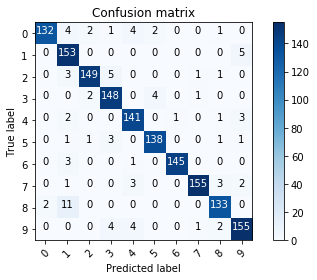

In [42]:
from sklearn.metrics import confusion_matrix
import itertools

best = svm.SVC(kernel='rbf', C=6.6, gamma=0.35)

Y_pred = best.fit(X_train, Y_train).predict(X_test)

def plot_confusion_matrix(cm, classes):
#     print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

print('Accuracy', best.score(X_test, Y_test))
plot_confusion_matrix(cnf_matrix, classes=range(0,10))

plt.show()